In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('trainingData.csv')

In [4]:
df.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


In [5]:
##drop the columns that are irrelevant to reduce memory usage

df.drop('SPACEID', axis=1, inplace=True)
df.drop('RELATIVEPOSITION',axis =1, inplace=True)
df.drop('TIMESTAMP', axis=1, inplace=True)
df.drop('PHONEID', axis=1, inplace=True)

In [6]:
df.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP516,WAP517,WAP518,WAP519,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,USERID
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,-7541.2643,4.864921e+06,2,1,2
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,-7536.6212,4.864934e+06,2,1,2
2,100,100,100,100,100,100,100,-97,100,100,...,100,100,100,100,100,-7519.1524,4.864950e+06,2,1,2
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,-7524.5704,4.864934e+06,2,1,2
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,-7632.1436,4.864982e+06,0,0,11


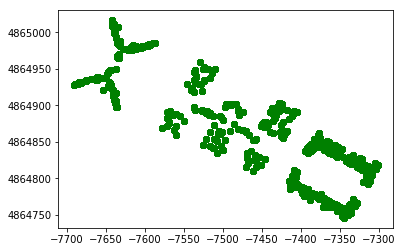

In [7]:
plt.plot(df['LONGITUDE'], df['LATITUDE'], 'go')

In [8]:
## remove columns with no signals

df = df[df.columns[df.sum() !=1993700]]

In [9]:
df.iloc[:,:-5] = abs(df.iloc[:,:-5])+1

In [10]:
#since no signals have been represented as 101 lets replace them with 0 for easy follow up
df.replace(101,0, inplace=True)

In [11]:
df.head()

,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,WAP515,WAP516,WAP517,WAP518,WAP519,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,USERID
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-7541.2643,4.864921e+06,2,1,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-7536.6212,4.864934e+06,2,1,2
2,0,0,0,0,0,98,0,0,0,0,...,0,0,0,0,0,-7519.1524,4.864950e+06,2,1,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-7524.5704,4.864934e+06,2,1,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-7632.1436,4.864982e+06,0,0,11


In [12]:
## converting the latitude and longitude columns to absolute values with no negative signs and ensuring that they are in range
df['ABSOLUTE_LONGITUDE'] = df['LONGITUDE'] - df['LONGITUDE'].min()
df['ABSOLUTE_LATITUDE'] = df['LATITUDE'] - df['LATITUDE'].min()
df.head()

,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,WAP517,WAP518,WAP519,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,USERID,ABSOLUTE_LONGITUDE,ABSOLUTE_LATITUDE
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,-7541.2643,4.864921e+06,2,1,2,150.0741,175.033184
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,-7536.6212,4.864934e+06,2,1,2,154.7172,188.480184
2,0,0,0,0,0,98,0,0,0,0,...,0,0,0,-7519.1524,4.864950e+06,2,1,2,172.1860,203.787184
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,-7524.5704,4.864934e+06,2,1,2,166.7680,188.347984
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,-7632.1436,4.864982e+06,0,0,11,59.1948,236.472084


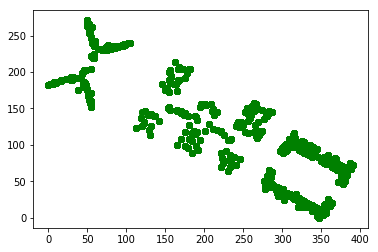

In [13]:
#confirm that the results are still same by ploting using absolute values

plt.plot(df['ABSOLUTE_LONGITUDE'], df['ABSOLUTE_LATITUDE'], 'go')

In [14]:
##initialize all wireless access point rows into a variable
WAPS = df.iloc[:,:-7].values

In [15]:
##predicting longitude using KNN

from math import sqrt

In [16]:
X = WAPS
y = df['ABSOLUTE_LONGITUDE']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [19]:
from sklearn import neighbors

In [20]:
model = neighbors.KNeighborsRegressor(n_neighbors = 7)
model.fit(X_train, y_train)
predicted_longitude=model.predict(X_test)

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
##calculate the mean squared erroe
mse = mean_squared_error(y_test,predicted_longitude)

In [23]:
## calculate root mean squared error
error = sqrt(mse)
print('RMSE is: ',error)

RMSE is:  11.134912318467366


In [24]:
print("R-Squared is: ", r2_score(y_test,predicted_longitude))

R-Squared is:  0.9917214010355013


In [25]:
## predict latitude
y = df['ABSOLUTE_LATITUDE']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [27]:
model = neighbors.KNeighborsRegressor(n_neighbors = 7)
model.fit(X_train, y_train)
predicted_latitude=model.predict(X_test)

In [28]:
mse = mean_squared_error(y_test,predicted_latitude)

In [29]:
error = sqrt(mse)
print('RMSE is: ',error)

RMSE is:  7.70609164059881


In [30]:
print("R-Squared is: ", r2_score(y_test,predicted_latitude))

R-Squared is:  0.9864685583353288
